# Import

In [18]:
import os
import cv2
import csv
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Global Variables

In [2]:
WalkingSubtaskROOT = "data/"


# Load ID

In [3]:
allID_list = []

def load_id_typeString(data_path):
    tmpList = []

    for folder in list(os.listdir(data_path)):
        if folder!="50": 
            tmpList.append(folder)
    return tmpList
    
allID_list = load_id_typeString(WalkingSubtaskROOT)

In [4]:
print(f'[Info] number of pid: {len(allID_list)}\n')
print(allID_list)

[Info] number of pid: 88

['01', '02', '03', '04', '05', '06', '07', '09', '10', '100', '11', '12', '13', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '43', '44', '45', '46', '48', '49', '51', '52', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


# Create New Folder

In [7]:
def create_folder(pidList):
    for pid in pidList:
        # folder_path = 'data/' + pid + '/refine_walking/'
        # folder_path = 'data/' + pid + '/refine_walking2/'
        folder_path = 'data/' + pid + '/Walking_20240307/' ### UPDATE [2024/03/07]
    
        if not os.path.exists(folder_path):
            print(f'[pid {pid}] {folder_path}')
            os.mkdir(folder_path)
        else:
            print(f'{pid} Folder for [Walking] has existed.')


create_folder(allID_list)

01 Folder for [Walking] has existed.
[pid 02] data/02/Walking_20240307/
[pid 03] data/03/Walking_20240307/
[pid 04] data/04/Walking_20240307/
[pid 05] data/05/Walking_20240307/
[pid 06] data/06/Walking_20240307/
[pid 07] data/07/Walking_20240307/
[pid 09] data/09/Walking_20240307/
[pid 10] data/10/Walking_20240307/
[pid 100] data/100/Walking_20240307/
[pid 11] data/11/Walking_20240307/
[pid 12] data/12/Walking_20240307/
[pid 13] data/13/Walking_20240307/
[pid 16] data/16/Walking_20240307/
[pid 17] data/17/Walking_20240307/
[pid 18] data/18/Walking_20240307/
[pid 19] data/19/Walking_20240307/
[pid 20] data/20/Walking_20240307/
[pid 21] data/21/Walking_20240307/
[pid 22] data/22/Walking_20240307/
[pid 24] data/24/Walking_20240307/
[pid 25] data/25/Walking_20240307/
[pid 26] data/26/Walking_20240307/
[pid 27] data/27/Walking_20240307/
[pid 28] data/28/Walking_20240307/
[pid 29] data/29/Walking_20240307/
[pid 30] data/30/Walking_20240307/
[pid 31] data/31/Walking_20240307/
[pid 32] data/32

# Change y-coordiante
* 1080 - yCoord

In [10]:
def change_y_Coordinate(WalkingSubtaskROOT, pidList, keypointIdx):
    n_keypoint = len(keypointIdx)
    
    for pid in pidList:
        if pid == "01":
        # if pid > "01":
            # cut1_path = WalkingSubtaskROOT + pid + '/' + pid + '_cut1_keypoints1.csv'
            # cut1_output = WalkingSubtaskROOT + pid + '/' + pid + '_cut1_keypoints1_2.csv'
            # cut2_path = WalkingSubtaskROOT + pid + '/' + pid + '_cut2_keypoints1.csv'
            # cut2_output = WalkingSubtaskROOT + pid + '/' + pid + '_cut2_keypoints1_2.csv'
            
            # cut1_path = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut1_keypoints1.csv'
            # cut1_output = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut1_keypoints1_2.csv'
            # cut2_path = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut2_keypoints1.csv'
            # cut2_output = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut2_keypoints1_2.csv'
            
            cut1_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut1_keypoints1.csv' ### [update] 2023/08/17
            cut1_output = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut1_keypoints1_2.csv'
            cut2_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut2_keypoints1.csv'
            cut2_output = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut2_keypoints1_2.csv'

            if (os.path.exists(cut1_path)==False) or (os.path.exists(cut2_path)==False):
                print(f'[Notice] pid {pid} walking coordinate file does not exist.')
            else:
                cut1_df = pd.read_csv(cut1_path, header=None)
                cut2_df = pd.read_csv(cut2_path, header=None)

                ### change y coord for [Cut 1]
                n_row, n_col = cut1_df.shape[0], cut1_df.shape[1]
                for i in range(n_row):
                    for j in range(n_keypoint):
                        kid = keypointIdx[j]
                        coordValue = cut1_df.iloc[[i],[kid]]
                        cut1_df.iloc[[i],[kid]] = 1080 - coordValue
                for i in range(n_row):
                    for j in range(n_col):
                        coordValue = cut1_df.iloc[[i],[j]]
                        cut1_df.iloc[[i],[j]] = round(coordValue, 2)

                ### change y coord for [Cut 2]
                n_row, n_col = cut2_df.shape[0], cut2_df.shape[1]
                for i in range(n_row):
                    for j in range(n_keypoint):
                        kid = keypointIdx[j]
                        coordValue = cut2_df.iloc[[i],[kid]]
                        cut2_df.iloc[[i],[kid]] = 1080 - coordValue
                for i in range(n_row):
                    for j in range(n_col):
                        coordValue = cut2_df.iloc[[i],[j]]
                        cut2_df.iloc[[i],[j]] = round(coordValue, 2)

                print(f'[pid {pid}] {cut1_output}, {cut2_output}')
                cut1_df.to_csv(cut1_output, index=False, header=False)
                cut2_df.to_csv(cut2_output, index=False, header=False)


y_keypointIdx = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]
change_y_Coordinate(WalkingSubtaskROOT, allID_list, y_keypointIdx)

[pid 01] data/01/Walking_20240307/01_cut1_keypoints1_2.csv, data/01/Walking_20240307/01_cut2_keypoints1_2.csv


# Data Pre-Processing

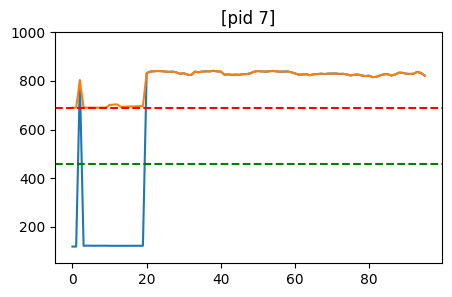

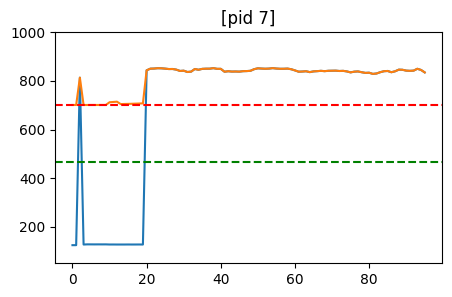

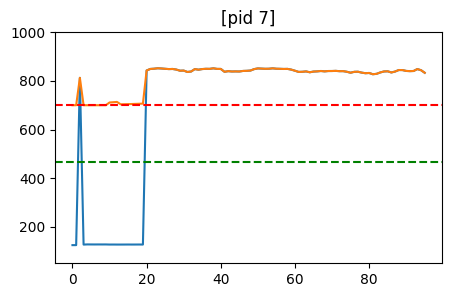

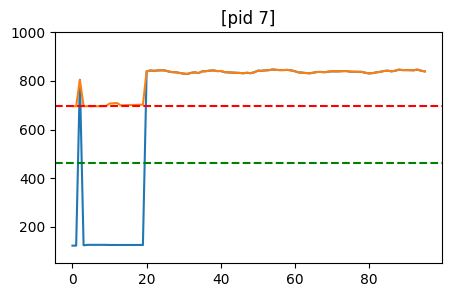

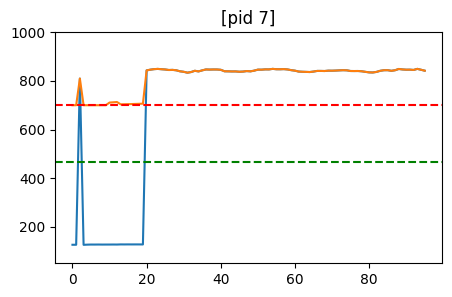

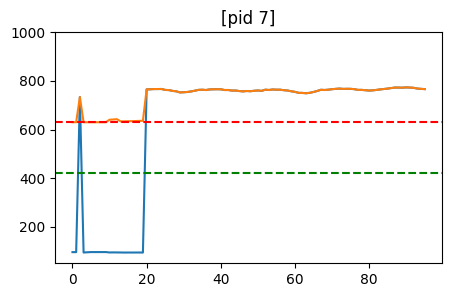

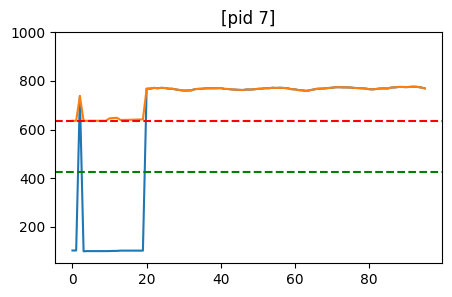

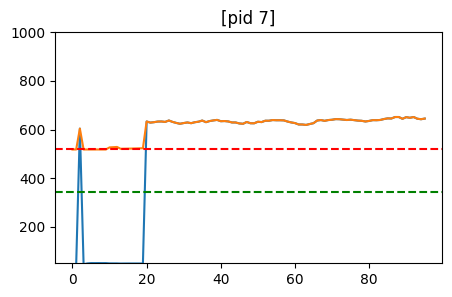

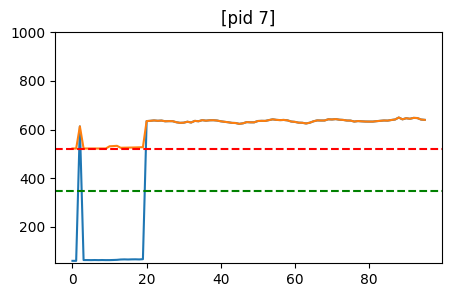

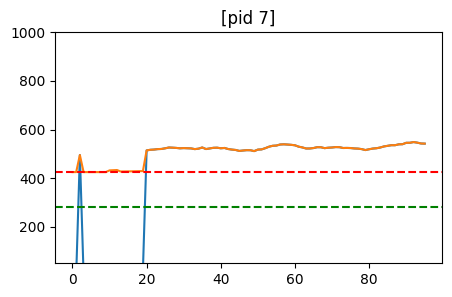

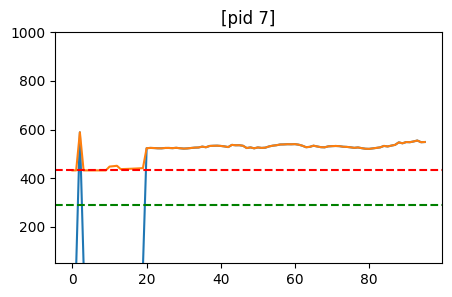

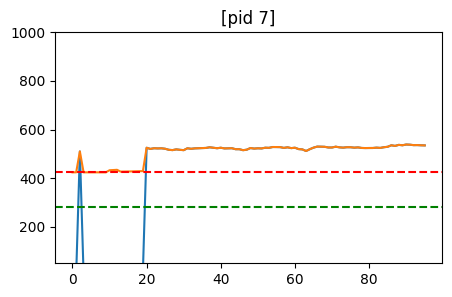

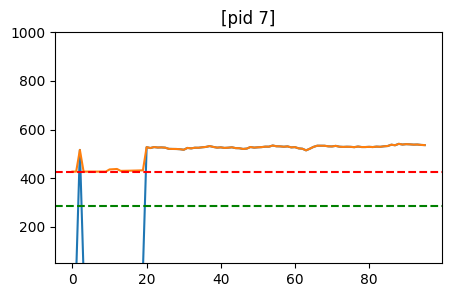

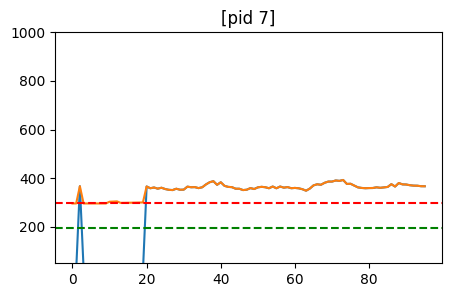

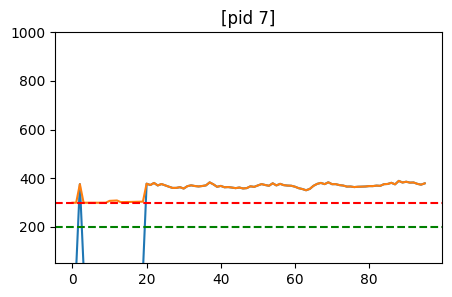

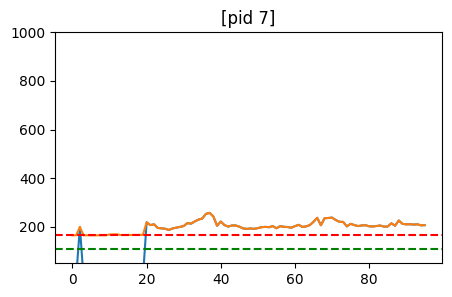

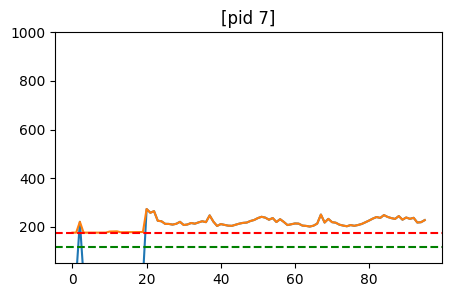

In [72]:
def data_preprocessing(pidList):
    for pid in pidList:
        if pid == '07':
            cut1_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut1_keypoints1_2.csv'
            cut1_path_output = WalkingSubtaskROOT + pid + '/Walking_20240307/' + pid + '_cut1_keypoints1_1_preprocess.csv'
    
            flag_modified = False
    
            
            if os.path.exists(cut1_path)==False:
                print(f'[Notice] pid {pid} walking coordinate file does not exist.')
            else:
                cut1_df = pd.read_csv(cut1_path, header=None)
    
                n_row = cut1_df.shape[0]
                n_col = cut1_df.shape[1]
                
                for colIdx in range(n_col):
                    # if colIdx%3==0: ### only choose X coordinate
                    #     value = cut1_df.iloc[:, colIdx].tolist()
                    #     value = np.array(value)
                    #     value_modified = value.copy()
                    #     start_pt_x, start_pt_y = 0, value[0]
                    #     end_pt_x, end_pt_y = len(value), value[-1]
                    #     plt.figure()
                    #     plt.plot(value)
                    #     plt.scatter(start_pt_x, start_pt_y, c='r', marker='o')
                    #     plt.scatter(end_pt_x, end_pt_y, c='r', marker='o')
                    #     plt.plot([start_pt_x, end_pt_x], [start_pt_y, end_pt_y])
                    #     plt.show()
    
                    ### only choose Y coordinate
                    if colIdx%3==1:
                        value = cut1_df.iloc[:, colIdx].tolist()
                        value = np.array(value)
                        value_modified = value.copy()
                        curMin, curMax = np.min(value), np.max(value)
                        curDiff = int(curMax-curMin)
                        curMean = int(np.mean(value))
                        prev = 10
    
                        for i, v in enumerate(value):
                            if v<int(curMean*2/3) and i>=prev:
                                flag_modified = True
                                start = i-prev
                                end = i
                                avg = np.mean(value_modified[start:end])
                                value_modified[end] = avg
                            if v<int(curMean*2/3) and i<prev:
                                value_modified[i] = curMean
    
                        if flag_modified==True:
                            plt.figure(figsize=(5, 3))
                            plt.plot(value)
                            plt.plot(value_modified)
                            plt.axhline(int(curMean), c='red', ls='--')
                            plt.axhline(int(curMean*2/3), c='green', ls='--')
                            plt.ylim(50, 1000)
                            plt.title(f'[pid {int(pid)}]')
                            plt.show()
    
                        cut1_df[colIdx] = value_modified
                        
                        # plt.figure()
                        # plt.plot(cut1_df.iloc[:, colIdx].tolist())
                        # plt.ylim(curMin, curMax+100)
                        # plt.show()
                cut1_df.to_csv(cut1_path_output, index=False, header=False)


data_preprocessing(allID_list)

# Generate Time Series data

In [8]:
def generate_time_series_data(WalkingSubtaskROOT, pidList, legs_keypointIdx, flag):
    for pid in pidList:
        if pid > "01":
            if flag=="cut1":
                # cut_path = WalkingSubtaskROOT + pid + '/' + pid + '_cut1_keypoints1_2.csv'
                # cut_output = WalkingSubtaskROOT + pid + '/' + pid + '_cut1_keypoints1_3.csv'
                # cut_path = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut1_keypoints1_2.csv'
                # cut_output = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut1_keypoints1_3.csv'
                cut_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut1_keypoints1_2.csv' ### [update] 2023/08/21
                cut_output = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut1_keypoints1_3.csv'
            elif flag=="cut2":
                # cut_path = WalkingSubtaskROOT + pid + '/' + pid + '_cut2_keypoints1_2.csv'
                # cut_output = WalkingSubtaskROOT + pid + '/' + pid + '_cut2_keypoints1_3.csv'
                # cut_path = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut2_keypoints1_2.csv'
                # cut_output = WalkingSubtaskROOT + pid + '/refine_walking2/' + pid + '_cut2_keypoints1_3.csv'
                cut_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut2_keypoints1_2.csv' ### [update] 2023/08/21
                cut_output = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut2_keypoints1_3.csv'
            else:
                print(f'[Notice] something wrong with flag.')

            if (os.path.exists(cut_path)==False) or (os.path.exists(cut_path)==False):
                print(f'[Notice] pid {pid} walking coordinate file does not exist.')
            else:
                df = pd.read_csv(cut_path, header=None)

                df = df.iloc[:, legs_keypointIdx]
                n_row, n_col = df.shape[0], df.shape[1]

                df_new = pd.DataFrame()

                xHip_add, yHip_add = [], []
                xKnee_add, yKnee_add = [], []
                xAnkle_add, yAnkle_add = [], []
                xHip_minus, yHip_minus = [], []
                xKnee_minus, yKnee_minus = [], []
                xAnkle_minus, yAnkle_minus = [], []

                for i in range(n_row):
                    xHip_left, yHip_left = df.iloc[[i], [0]].values[0][0], df.iloc[[i], [1]].values[0][0]
                    xHip_right, yHip_right = df.iloc[[i], [2]].values[0][0], df.iloc[[i], [3]].values[0][0]
                    xKnee_left, yKnee_left = df.iloc[[i], [4]].values[0][0], df.iloc[[i], [5]].values[0][0]
                    xKnee_right, yKnee_right = df.iloc[[i], [6]].values[0][0], df.iloc[[i], [7]].values[0][0]
                    xAnkle_left, yAnkle_left = df.iloc[[i], [8]].values[0][0], df.iloc[[i], [9]].values[0][0]
                    xAnkle_right, yAnkle_right = df.iloc[[i], [10]].values[0][0], df.iloc[[i], [11]].values[0][0]

                    xHip_add.append(round(xHip_left+xHip_right, 2))
                    yHip_add.append(round(yHip_left+yHip_right, 2))
                    xKnee_add.append(round(xKnee_left+xKnee_right, 2))
                    yKnee_add.append(round(yKnee_left+yKnee_right, 2))
                    xAnkle_add.append(round(xAnkle_left+xAnkle_right, 2))
                    yAnkle_add.append(round(yAnkle_left+yAnkle_right, 2))

                    xHip_minus.append(round(np.abs(xHip_left-xHip_right), 2))
                    yHip_minus.append(round(np.abs(yHip_left-yHip_right), 2))
                    xKnee_minus.append(round(np.abs(xKnee_left-xKnee_right), 2))
                    yKnee_minus.append(round(np.abs(yKnee_left-yKnee_right), 2))
                    xAnkle_minus.append(round(np.abs(xAnkle_left-xAnkle_right), 2))
                    yAnkle_minus.append(round(np.abs(yAnkle_left-yAnkle_right), 2))

                nameList = ['xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
                valueList = [xHip_add, xKnee_add, xAnkle_add, xHip_minus, xKnee_minus, xAnkle_minus, yHip_add, yKnee_add, yAnkle_add, yHip_minus, yKnee_minus, yAnkle_minus]

                for i in range(len(nameList)):
                    tmp = nameList[i]
                    df_new.insert(i, tmp, valueList[i])

                print(f'[pid {pid}] {cut_output}')
                df_new.to_csv(cut_output, index=None, header=None)
                
                
                
legs_keypointIdx = [33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49]
generate_time_series_data(WalkingSubtaskROOT, allID_list, legs_keypointIdx, "cut1")
generate_time_series_data(WalkingSubtaskROOT, allID_list, legs_keypointIdx, "cut2")

[pid 02] data/02/Walking_0817/02_cut1_keypoints1_3.csv
[pid 03] data/03/Walking_0817/03_cut1_keypoints1_3.csv
[pid 04] data/04/Walking_0817/04_cut1_keypoints1_3.csv
[pid 05] data/05/Walking_0817/05_cut1_keypoints1_3.csv
[pid 06] data/06/Walking_0817/06_cut1_keypoints1_3.csv
[pid 07] data/07/Walking_0817/07_cut1_keypoints1_3.csv
[pid 09] data/09/Walking_0817/09_cut1_keypoints1_3.csv
[pid 10] data/10/Walking_0817/10_cut1_keypoints1_3.csv
[pid 100] data/100/Walking_0817/100_cut1_keypoints1_3.csv
[pid 11] data/11/Walking_0817/11_cut1_keypoints1_3.csv
[pid 12] data/12/Walking_0817/12_cut1_keypoints1_3.csv
[pid 13] data/13/Walking_0817/13_cut1_keypoints1_3.csv
[pid 16] data/16/Walking_0817/16_cut1_keypoints1_3.csv
[pid 17] data/17/Walking_0817/17_cut1_keypoints1_3.csv
[pid 18] data/18/Walking_0817/18_cut1_keypoints1_3.csv
[pid 19] data/19/Walking_0817/19_cut1_keypoints1_3.csv
[pid 20] data/20/Walking_0817/20_cut1_keypoints1_3.csv
[pid 21] data/21/Walking_0817/21_cut1_keypoints1_3.csv
[pid 22

# Generate Time Series data [Smooth first]

In [32]:
from scipy.signal import savgol_filter

In [49]:
def smooth_coordinate(df):
    ### data.shape = (96, 12) = 96 rows, 12 cols
    n_cols = df.shape[1]

    resultArray_smooth = []
    for i in range(n_cols):
        x = df.iloc[:, i].values
        x_smooth = savgol_filter(x, window_length=20, polyorder=10)
        x_smooth = np.round(x_smooth, 2)
        resultArray_smooth.append(x_smooth)

        # plt.figure(figsize=(5, 3))
        # plt.plot(x, 'r')
        # plt.plot(x_smooth, 'b')
        # plt.show()

    smooth_data = []
    resultArray = np.array(resultArray_smooth)
    nFrames = resultArray.shape[1]
    for i in range(nFrames):
        smooth_data.append([resultArray[0][i], resultArray[1][i],
                            resultArray[2][i], resultArray[3][i],
                            resultArray[4][i], resultArray[5][i],
                            resultArray[6][i], resultArray[7][i],
                            resultArray[8][i], resultArray[9][i],
                            resultArray[10][i], resultArray[11][i]])
    smooth_data = np.array(smooth_data)
    df_smooth = pd.DataFrame(smooth_data)
    return df_smooth
        

def generate_time_series_data_smooth(WalkingSubtaskROOT, pidList, legs_keypointIdx, flag):
    for pid in pidList:
        if pid >= "01":
            if flag=="cut1":
                cut_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut1_keypoints1_2.csv'
                cut_output = WalkingSubtaskROOT + pid + '/Walking_20240307/' + pid + '_cut1_keypoints1_3.csv'
            elif flag=="cut2":
                cut_path = WalkingSubtaskROOT + pid + '/Walking_0817/' + pid + '_cut2_keypoints1_2.csv'
                cut_output = WalkingSubtaskROOT + pid + '/Walking_20240307/' + pid + '_cut2_keypoints1_3.csv'
            else:
                print(f'[Notice] something wrong with flag.')

            if (os.path.exists(cut_path)==False) or (os.path.exists(cut_path)==False):
                print(f'[Notice] pid {pid} walking coordinate file does not exist.')
            else:
                df = pd.read_csv(cut_path, header=None)

                df = df.iloc[:, legs_keypointIdx]
                n_row, n_col = df.shape[0], df.shape[1]

                df = smooth_coordinate(df)

                df_new = pd.DataFrame()

                xHip_add, yHip_add = [], []
                xKnee_add, yKnee_add = [], []
                xAnkle_add, yAnkle_add = [], []
                xHip_minus, yHip_minus = [], []
                xKnee_minus, yKnee_minus = [], []
                xAnkle_minus, yAnkle_minus = [], []

                for i in range(n_row):
                    xHip_left, yHip_left = df.iloc[[i], [0]].values[0][0], df.iloc[[i], [1]].values[0][0]
                    xHip_right, yHip_right = df.iloc[[i], [2]].values[0][0], df.iloc[[i], [3]].values[0][0]
                    xKnee_left, yKnee_left = df.iloc[[i], [4]].values[0][0], df.iloc[[i], [5]].values[0][0]
                    xKnee_right, yKnee_right = df.iloc[[i], [6]].values[0][0], df.iloc[[i], [7]].values[0][0]
                    xAnkle_left, yAnkle_left = df.iloc[[i], [8]].values[0][0], df.iloc[[i], [9]].values[0][0]
                    xAnkle_right, yAnkle_right = df.iloc[[i], [10]].values[0][0], df.iloc[[i], [11]].values[0][0]

                    xHip_add.append(round(xHip_left+xHip_right, 2))
                    yHip_add.append(round(yHip_left+yHip_right, 2))
                    xKnee_add.append(round(xKnee_left+xKnee_right, 2))
                    yKnee_add.append(round(yKnee_left+yKnee_right, 2))
                    xAnkle_add.append(round(xAnkle_left+xAnkle_right, 2))
                    yAnkle_add.append(round(yAnkle_left+yAnkle_right, 2))

                    xHip_minus.append(round(np.abs(xHip_left-xHip_right), 2))
                    yHip_minus.append(round(np.abs(yHip_left-yHip_right), 2))
                    xKnee_minus.append(round(np.abs(xKnee_left-xKnee_right), 2))
                    yKnee_minus.append(round(np.abs(yKnee_left-yKnee_right), 2))
                    xAnkle_minus.append(round(np.abs(xAnkle_left-xAnkle_right), 2))
                    yAnkle_minus.append(round(np.abs(yAnkle_left-yAnkle_right), 2))

                nameList = ['xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
                valueList = [xHip_add, xKnee_add, xAnkle_add, xHip_minus, xKnee_minus, xAnkle_minus, yHip_add, yKnee_add, yAnkle_add, yHip_minus, yKnee_minus, yAnkle_minus]

                for i in range(len(nameList)):
                    tmp = nameList[i]
                    df_new.insert(i, tmp, valueList[i])

                print(f'[pid {pid}] {cut_output}')
                df_new.to_csv(cut_output, index=None, header=None)
                
                

In [50]:
legs_keypointIdx = [33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49]
generate_time_series_data_smooth(WalkingSubtaskROOT, allID_list, legs_keypointIdx, "cut1")
generate_time_series_data_smooth(WalkingSubtaskROOT, allID_list, legs_keypointIdx, "cut2")

[pid 01] data/01/Walking_20240307/01_cut1_keypoints1_3.csv
[pid 02] data/02/Walking_20240307/02_cut1_keypoints1_3.csv
[pid 03] data/03/Walking_20240307/03_cut1_keypoints1_3.csv
[pid 04] data/04/Walking_20240307/04_cut1_keypoints1_3.csv
[pid 05] data/05/Walking_20240307/05_cut1_keypoints1_3.csv
[pid 06] data/06/Walking_20240307/06_cut1_keypoints1_3.csv
[pid 07] data/07/Walking_20240307/07_cut1_keypoints1_3.csv
[pid 09] data/09/Walking_20240307/09_cut1_keypoints1_3.csv
[pid 10] data/10/Walking_20240307/10_cut1_keypoints1_3.csv
[pid 100] data/100/Walking_20240307/100_cut1_keypoints1_3.csv
[pid 11] data/11/Walking_20240307/11_cut1_keypoints1_3.csv
[pid 12] data/12/Walking_20240307/12_cut1_keypoints1_3.csv
[pid 13] data/13/Walking_20240307/13_cut1_keypoints1_3.csv
[pid 16] data/16/Walking_20240307/16_cut1_keypoints1_3.csv
[pid 17] data/17/Walking_20240307/17_cut1_keypoints1_3.csv
[pid 18] data/18/Walking_20240307/18_cut1_keypoints1_3.csv
[pid 19] data/19/Walking_20240307/19_cut1_keypoints1_